In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

from tqdm import tqdm
from copy import deepcopy
from matplotlib import cm
from matplotlib import dates
from change_finder import ChangeFinder, SDAR

In [2]:
sns.set()
sns.mpl.rcParams['figure.figsize'] = (25.0, 10.0)
sns.mpl.rcParams['savefig.dpi'] = 90
sns.mpl.rcParams['font.family'] = 'sans-serif'
sns.mpl.rcParams['font.size'] = 14

In [3]:
df_data = pd.read_csv(r'/home/brainiac/Vlad/Jupyter Notebooks/DataSets/2019_2020_t1000_BRAINIAC.csv')

In [4]:
len(df_data)

243921

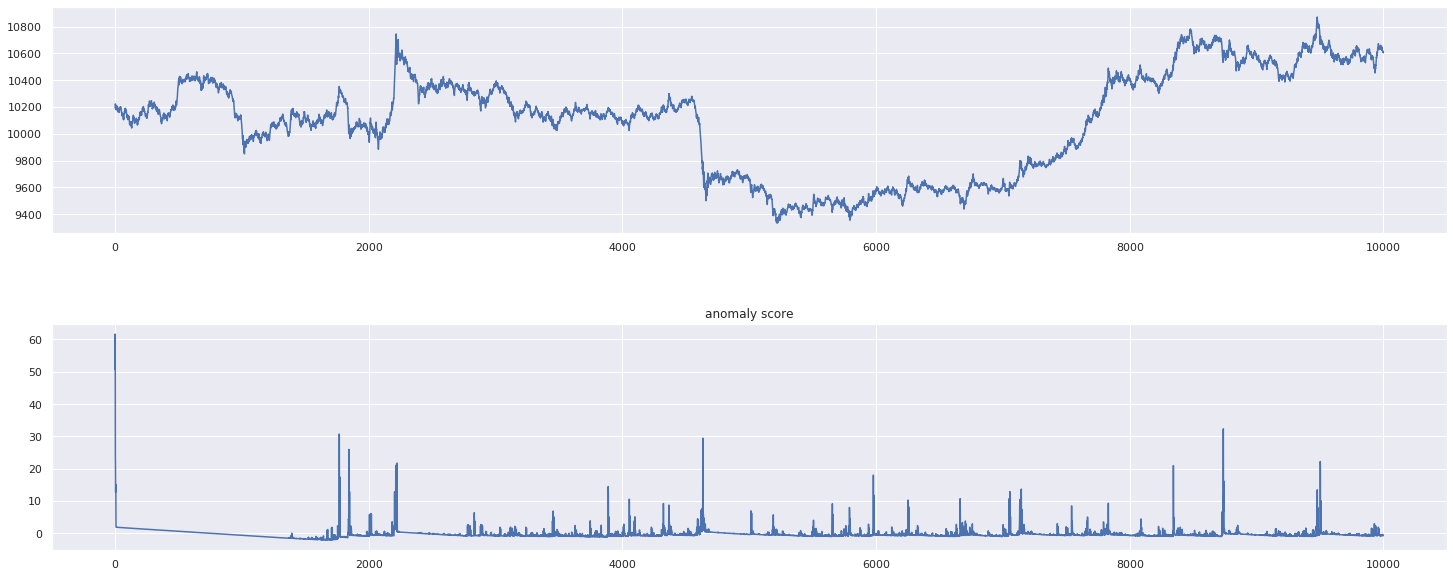

In [71]:
f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)

points = df_data['close'][150_000:160_000].values
ax1.plot(points)

cf = ChangeFinder()
scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("anomaly score")

plt.show()

In [66]:
outliers = []
for i in range(10, len(scores[10:])):
    if scores[i] > 5:
        #outliers.append([i, scores[i]])
        outliers.append(i)

In [67]:
boundaries_regimes = []
boundaries_regimes.append(outliers[0])
for i in range(1, len(outliers)):
    if outliers[i] - outliers[i-1] > 2:
        boundaries_regimes.append(outliers[i]) 

In [68]:
outliers

[1767,
 1768,
 1772,
 1773,
 1842,
 1843,
 1844,
 1848,
 1849,
 2005,
 2006,
 2014,
 2015,
 2016,
 2020,
 2021,
 2203,
 2204,
 2209,
 2212,
 2213,
 2214,
 2215,
 2216,
 2218,
 2219,
 2223,
 2224,
 2831,
 2832,
 3454,
 3455,
 3459,
 3888,
 3889,
 3893,
 4054,
 4055,
 4059,
 4060,
 4098,
 4323,
 4324,
 4366,
 4367,
 4620,
 4621,
 4624,
 4625,
 4627,
 4628,
 4631,
 4632,
 4633,
 4634,
 4635,
 4636,
 4638,
 5013,
 5014,
 5018,
 5019,
 5189,
 5190,
 5655,
 5656,
 5660,
 5661,
 5790,
 5791,
 5978,
 5979,
 5983,
 5984,
 6252,
 6253,
 6257,
 6258,
 6662,
 6663,
 7048,
 7049,
 7050,
 7051,
 7054,
 7055,
 7059,
 7132,
 7133,
 7134,
 7144,
 7145,
 7149,
 7150,
 7541,
 7542,
 7831,
 8343,
 8344,
 8345,
 8346,
 8728,
 8729,
 8737,
 8738,
 8739,
 8740,
 8741,
 8742,
 8743,
 9475,
 9476,
 9478,
 9479,
 9483,
 9484,
 9502,
 9503,
 9507,
 9508,
 10259,
 10260,
 10262,
 10263,
 10499,
 10500,
 10504,
 10505,
 10701,
 10702,
 10706,
 10707,
 10977,
 10978,
 10979,
 10981,
 11013,
 11014,
 11017,
 11018,


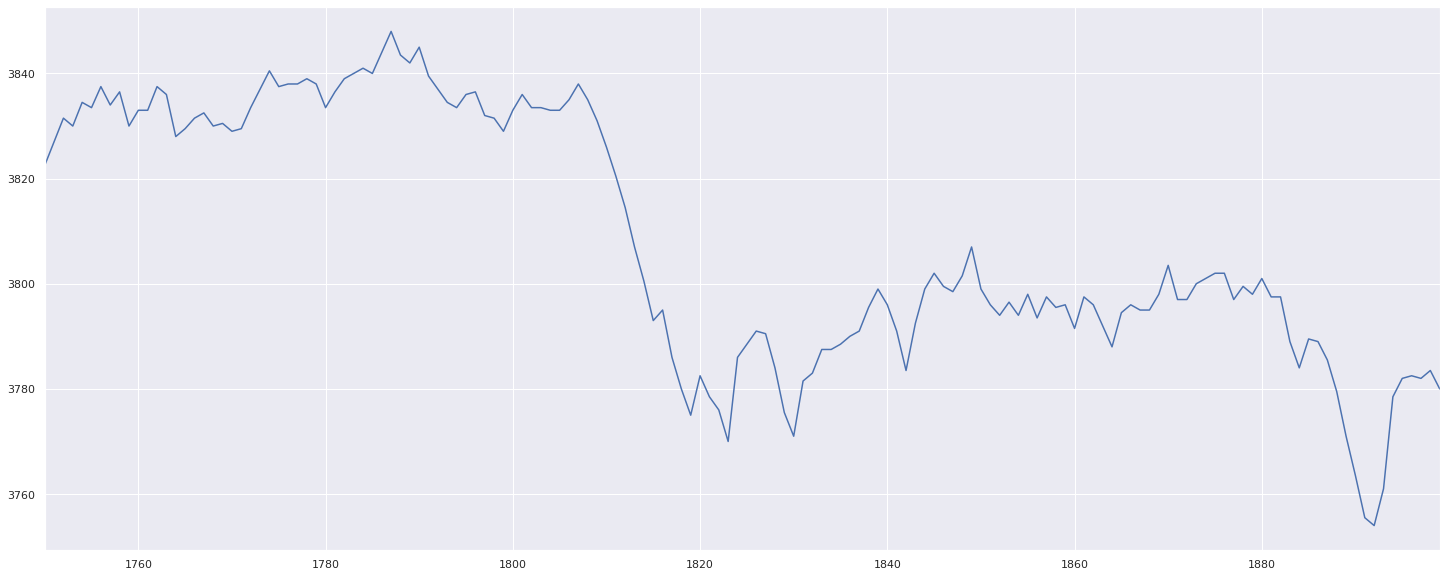

In [70]:
df_data['close'][1750:1900].plot()

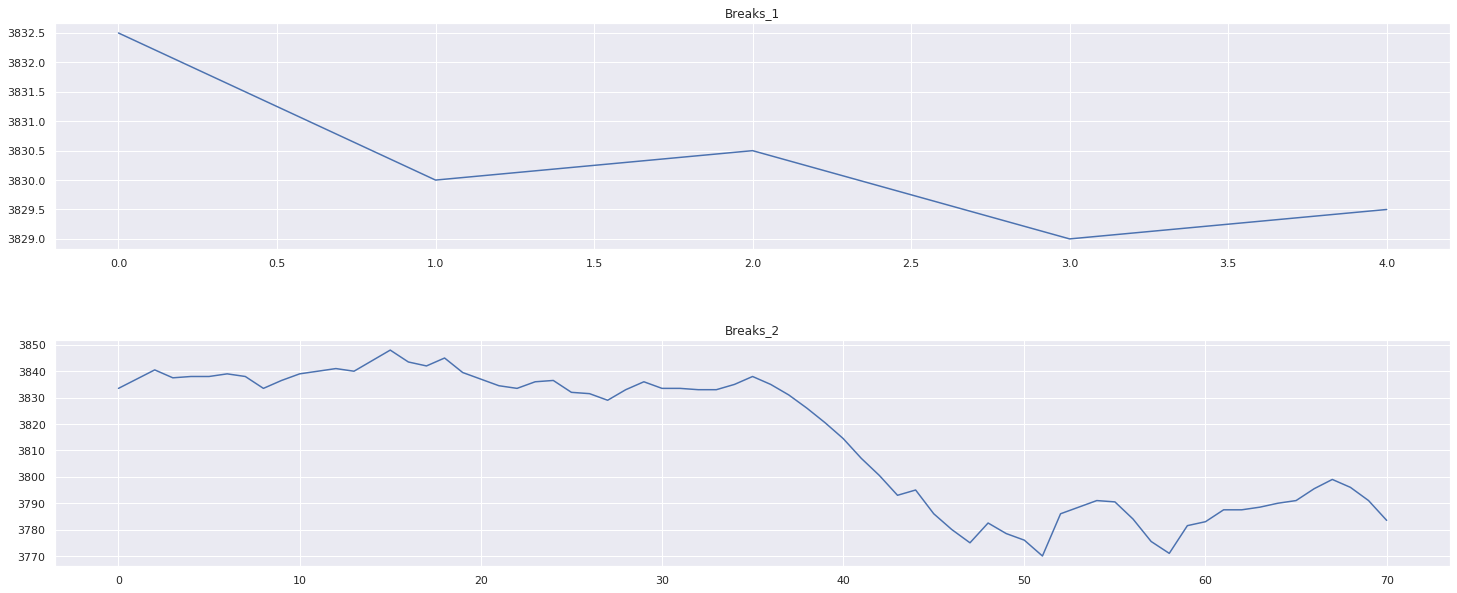

In [57]:
bord = 1

f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)

breaks_1 = df_data['close'][boundaries_regimes[bord-1]:boundaries_regimes[bord]].values
ax1.plot(breaks_1)
ax1.set_title("Breaks_1")

breaks_2 = df_data['close'][boundaries_regimes[bord]:boundaries_regimes[bord+1]].values
ax2.plot(breaks_2)
ax2.set_title("Breaks_2")
plt.show()

# Метод 2

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [46]:
def generate_normal_time_series(num, minl=50, maxl=1000):
    data = np.array([], dtype=np.float64)
    partition = np.random.randint(minl, maxl, num)
    for p in partition:
        mean = np.random.randn()*10
        var = np.random.randn()*1
        if var < 0:
            var = var * -1
        tdata = np.random.normal(mean, var, p)
        data = np.concatenate((data, tdata))
    return data

In [47]:
data = generate_normal_time_series(7, 50, 200)

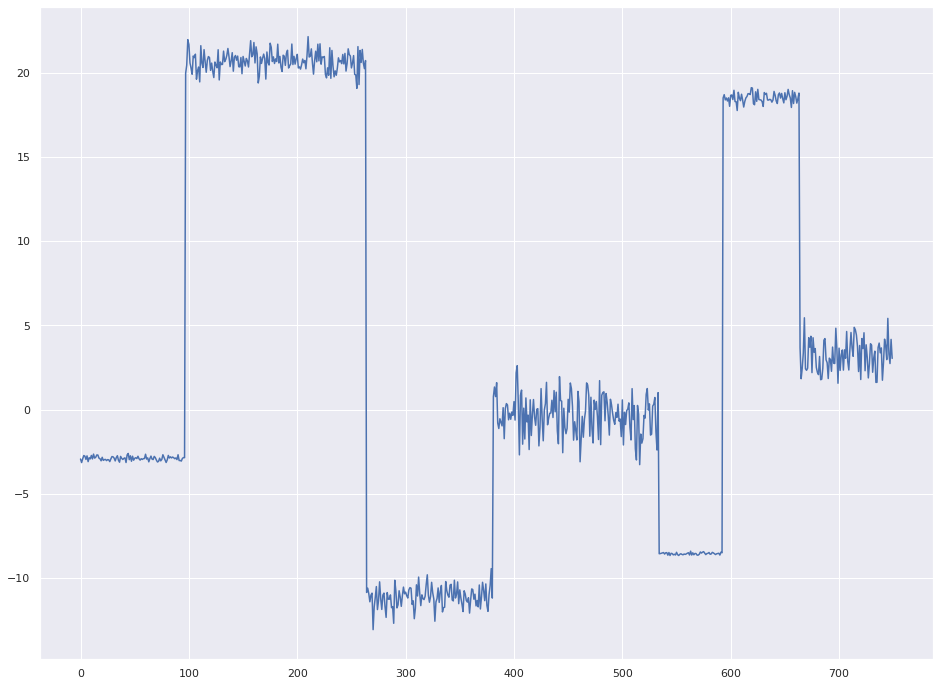

In [48]:
fig, ax = plt.subplots(figsize=[16, 12])
ax.plot(data)

In [49]:
import cProfile

In [93]:
import bayesian_changepoint_detection.online_changepoint_detection as oncd
from functools import partial

R, maxes = oncd.online_changepoint_detection(df_data['close'][0:100].values, partial(oncd.constant_hazard, 250), oncd.StudentT(0.1, .01, 1, 0))

/home/brainiac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


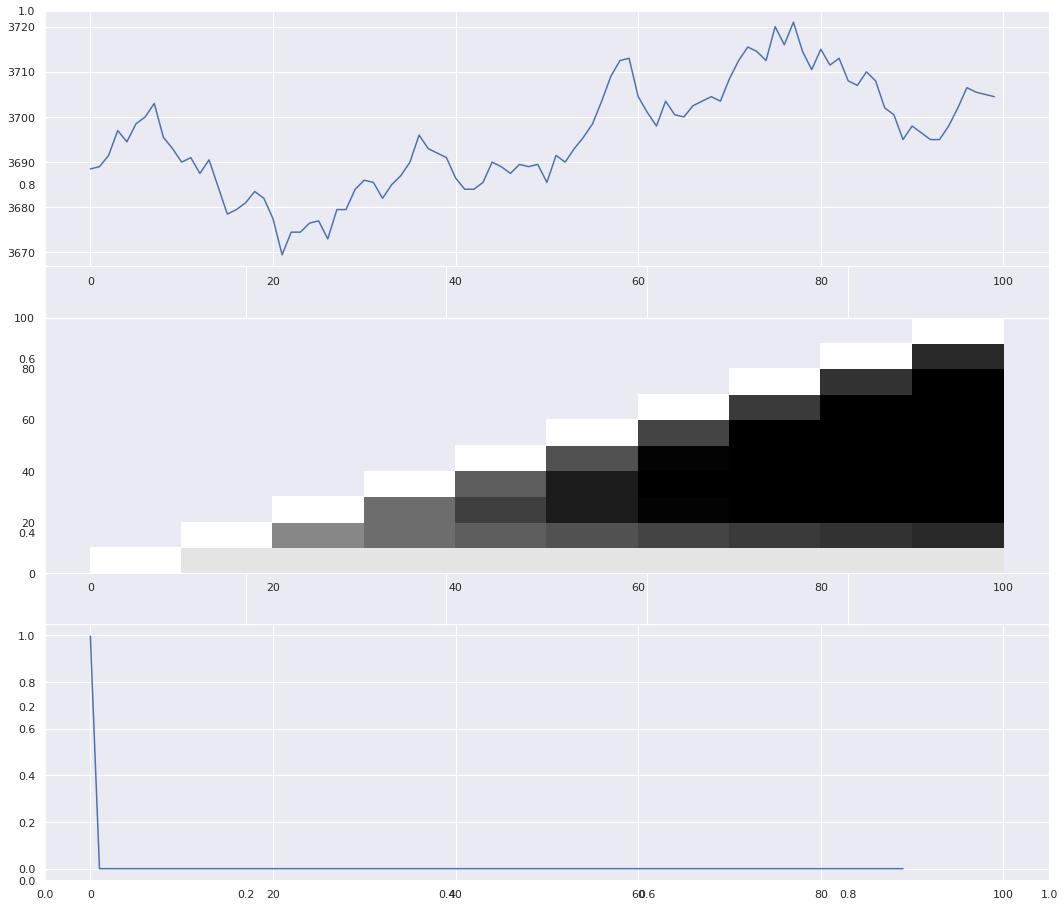

In [94]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(3, 1, 1)
ax.plot(df_data['close'][0:100].values)

ax = fig.add_subplot(3, 1, 2, sharex=ax)
sparsity = 10  # only plot every fifth data for faster display
ax.pcolor(np.array(range(0, len(R[:,0]), sparsity)), 
          np.array(range(0, len(R[:,0]), sparsity)), 
          -np.log(R[0:-1:sparsity, 0:-1:sparsity]), 
          cmap=cm.Greys, vmin=0, vmax=30)
ax = fig.add_subplot(3, 1, 3, sharex=ax)
Nw=10;
ax.plot(R[Nw,Nw:-1])